Given house_price.csv which contains property prices in the city of Bangalore, need to examine price per square feet.


# Importing necessary libraries

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest,kurtosis
from sklearn.preprocessing import PowerTransformer


# Loading dataset

In [137]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Preprocessing steps

In [138]:
#Finding and Removing duplicate rows
df.duplicated().sum()
df=df.drop_duplicates()
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12151 non-null  object 
 1   size            12151 non-null  object 
 2   total_sqft      12151 non-null  float64
 3   bath            12151 non-null  float64
 4   price           12151 non-null  float64
 5   bhk             12151 non-null  int64  
 6   price_per_sqft  12151 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 759.4+ KB


,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [139]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [140]:
# Removing unnecessary column
df.drop(["size"], axis=1,inplace=True)

C:\Users\prave\AppData\Local\Temp\ipykernel_18896\1353796051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["size"], axis=1,inplace=True)


In [141]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13194,Green Glen Layout,1715.0,3.0,112.00,3,6530
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258


In [142]:
df.info()
df.isnull().sum()
# No missing value

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12151 non-null  object 
 1   total_sqft      12151 non-null  float64
 2   bath            12151 non-null  float64
 3   price           12151 non-null  float64
 4   bhk             12151 non-null  int64  
 5   price_per_sqft  12151 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 664.5+ KB


location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

# Detecting and Removing the Outliers 
Detecting the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 

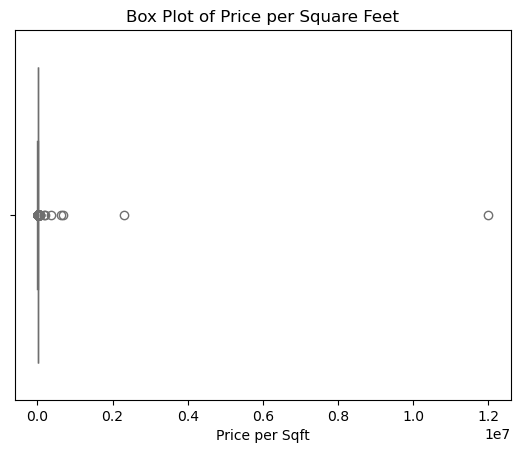

In [143]:

sns.boxplot(x=df['price_per_sqft'], color='skyblue')                 ###########################################################
plt.title("Box Plot of Price per Square Feet")
plt.xlabel("Price per Sqft")
plt.show()

#  a)Mean and Standard Deviation

In [144]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define bounds
lb = mean-3*std
ub = mean+3*std

df_trimmed_mean = df[ (df['price_per_sqft'] >= lb ) & (df['price_per_sqft'] <= ub) ]
df_trimmed_mean

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13194,Green Glen Layout,1715.0,3.0,112.00,3,6530
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258


In [145]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define bounds
upper = mean + 3*std
lower = mean - 3*std

# Trim outliers
df_trimmed_mean = df[(df['price_per_sqft'] <= upper) & (df['price_per_sqft'] >= lower)]

# Outlier
outlier_mean = df[ (df['price_per_sqft'] < lb ) | (df['price_per_sqft'] > ub) ]
print("No.of outliers using mean trimming ",len(outlier_mean))

No.of outliers using mean trimming  5


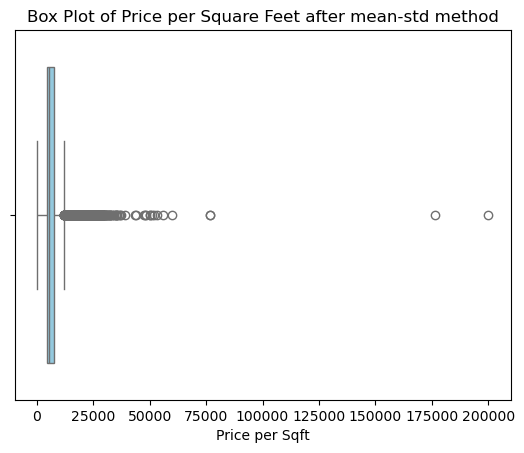

In [146]:
sns.boxplot(x=df_trimmed_mean['price_per_sqft'], color='skyblue')
plt.title("Box Plot of Price per Square Feet after mean-std method")
plt.xlabel("Price per Sqft")
plt.show()

# b)Percentile method

In [147]:
# defining 5%  and 95%  as lower and upper percentile 
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Trimming 
df_percentile_trimmed = df[ (df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile) ]

# Outliers
df_percentile_outlier = df[ (df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print("no.of outliers using percentile method ",len(df_percentile_outlier))

no.of outliers using percentile method  1211


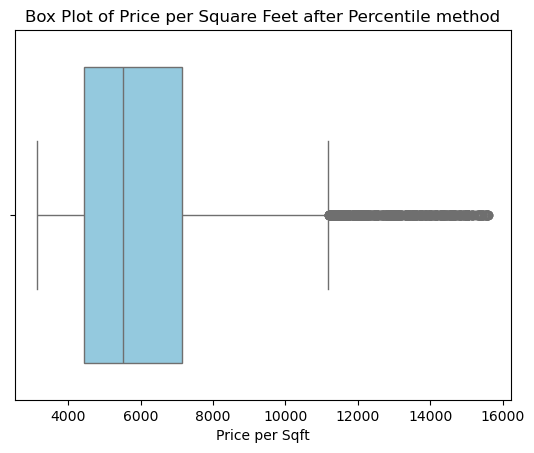

In [148]:
sns.boxplot(x=df_percentile_trimmed['price_per_sqft'], color='skyblue')   
plt.title("Box Plot of Price per Square Feet after Percentile method")
plt.xlabel("Price per Sqft")
plt.show()

# c) IQR(Inter quartile range method)

In [149]:
#defining Q1 Q3 
Q1 = df['price_per_sqft'].quantile([.25])
Q3 = df['price_per_sqft'].quantile([.75])


In [150]:
# Finding IQR = Q3 -Q1
IQR = 7461.0 - 4312.0
IQR

3149.0

In [151]:
# Defining upper and lower bound 
lower = 4312.0 - 1.5*IQR
upper = 7461.0 + 1.5*IQR

# Trimming outliers
df_iqr = df[ (df['price_per_sqft'] >= lower) & 
              (df['price_per_sqft'] <= upper) ]

# Outliers
outlier_iqr = df[ (df['price_per_sqft'] < lower) |
              (df['price_per_sqft'] > upper) ]
print("No.of outlier detected using IQR method",len(outlier_iqr))


No.of outlier detected using IQR method 1142


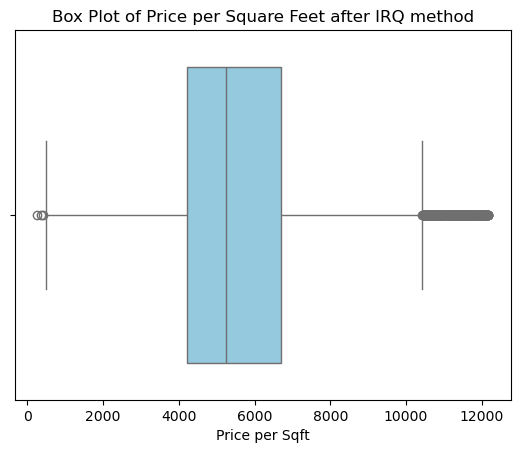

In [152]:
sns.boxplot(x=df_iqr['price_per_sqft'], color='skyblue')
plt.title("Box Plot of Price per Square Feet after IRQ method")
plt.xlabel("Price per Sqft")
plt.show()

# d) Z Score method

In [153]:
df['zscore'] = zscore(df['price_per_sqft'])
df_zscore_trimmed = df[( df['zscore'] >= -3 ) & (df['zscore'] <= 3) ]

# Outliers
df_outliers_zscore = df[( df['zscore'] < -3 ) | (df['zscore'] > 3) ]
print("No.of outlier detected using Z score method",len(df_outliers_zscore))


No.of outlier detected using Z score method 5


C:\Users\prave\AppData\Local\Temp\ipykernel_18896\315399518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = zscore(df['price_per_sqft'])


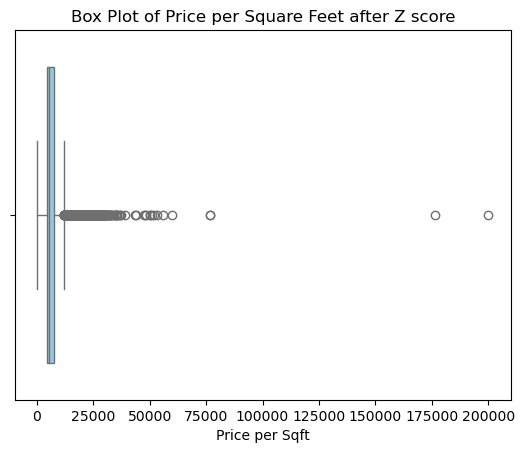

In [154]:
sns.boxplot(x=df_zscore_trimmed['price_per_sqft'], color='skyblue')
plt.title("Box Plot of Price per Square Feet after Z score")
plt.xlabel("Price per Sqft")
plt.show()

Z-score and Mean-Std are sensitive to extreme outliers and may fail if the data is not normally distributed. here data not normally distiboted,
From above 4 methods of outlier detection Percentile method and IQR methods give comparetvely cleaned datasets.comparing number of data trimmed and range of price per sqft of remaining dataset we can choose IQR method for outlier detection.

# Drawing histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

Text(0.5, 1.0, 'Box plot for Price per sqft before Transformation')

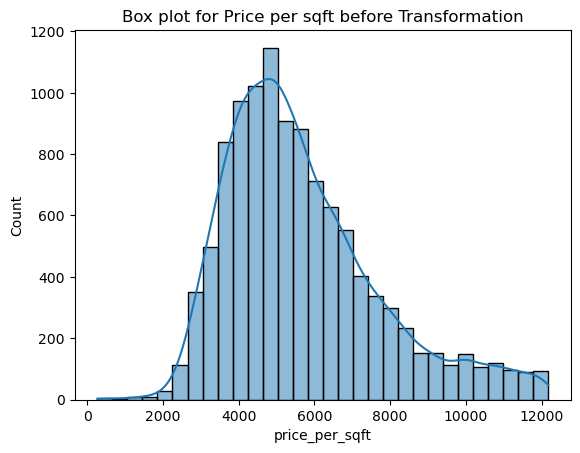

In [182]:
# drawing histplot to check normality of column 'price per column'
sns.histplot(df_iqr['price_per_sqft'], bins=30, kde=True,)
plt.title("Box plot for Price per sqft before Transformation")


In [ ]:
# data is right skewed. need to perform transformation.All values in 'price per sqft' column are positive 

# 1.Log Transformation

In [176]:
# Performing log transformation
df_iqr['log_price_per_sqft'] = np.log(df_iqr['price_per_sqft'])


C:\Users\prave\AppData\Local\Temp\ipykernel_18896\1201402000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['log_price_per_sqft'] = np.log(df_iqr['price_per_sqft'])


In [180]:
# Checking skewness and kurtosis before and after transformation 
print("skewness before transformation: ",skew(df_iqr['price_per_sqft']))
print("Kurtosis before transformation: ",kurtosis(df_iqr['price_per_sqft']))

print("Skewness after log transformation: ",skew(df_iqr['log_price_per_sqft']))
print("kurtosis after log transformation: ",kurtosis(df_iqr['log_price_per_sqft']))


skewness before transformation:  0.977706626713186
Kurtosis before transformation:  0.7158216744424215
Skewness after log transformation:  -0.10743969045446013
kurtosis after log transformation:  1.3088909131974225


Text(0.5, 1.0, 'Log-Transformed')

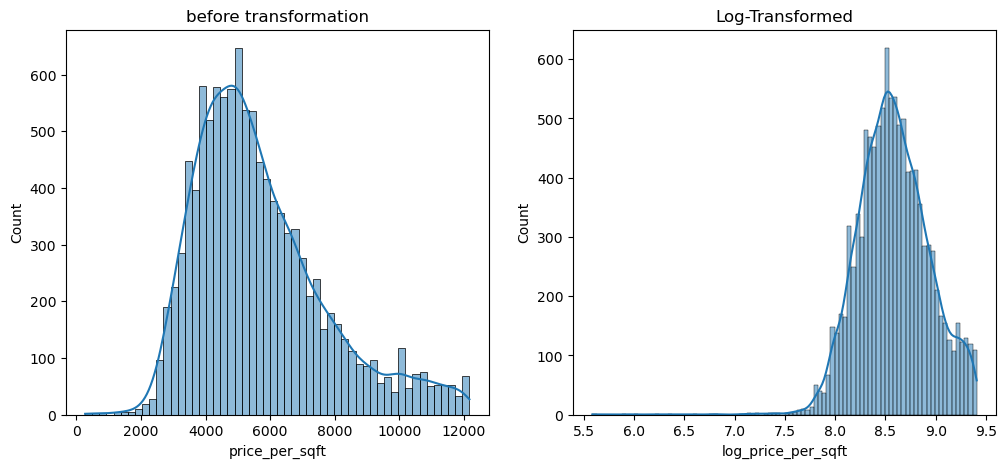

In [222]:
plt.figure(figsize=(12, 5))

# Before Transformation
plt.subplot(1, 2, 1)
sns.histplot(df_iqr['price_per_sqft'], kde=True)
plt.title("before transformation")

# After log transformation
plt.subplot(1, 2, 2)
sns.histplot(df_iqr['log_price_per_sqft'], kde=True)
plt.title("Log-Transformed")

# 2. square root Transformation

In [185]:
df_iqr['sqrt_trns'] = np.sqrt(df_iqr['price_per_sqft'])
df_iqr['sqrt_trns']

C:\Users\prave\AppData\Local\Temp\ipykernel_18896\670893198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['sqrt_trns'] = np.sqrt(df_iqr['price_per_sqft'])


0         60.819405
1         67.933791
2         65.612499
3         79.025312
4         65.192024
            ...    
13194     80.808415
13195     81.786307
13196    105.408728
13197     72.512068
13198    102.014705
Name: sqrt_trns, Length: 11009, dtype: float64

In [196]:
# checking skewness and kurtosis before and after transfromation

print("Skewness before transformation: ",skew(df_iqr['price_per_sqft']))
print("skewness after square root transformed: ",skew(df_iqr['sqrt_trns']) ,"\n")

print("kurtosis before transformation:", kurtosis(df_iqr['price_per_sqft']))
print("Kurtosis after square root transformation: ", kurtosis(df_iqr['sqrt_trns']))

Skewness before transformation:  0.977706626713186
skewness after square root transformed:  0.5220223633760829 

kurtosis before transformation: 0.7158216744424215
Kurtosis after square root transformation:  0.14275605687231252


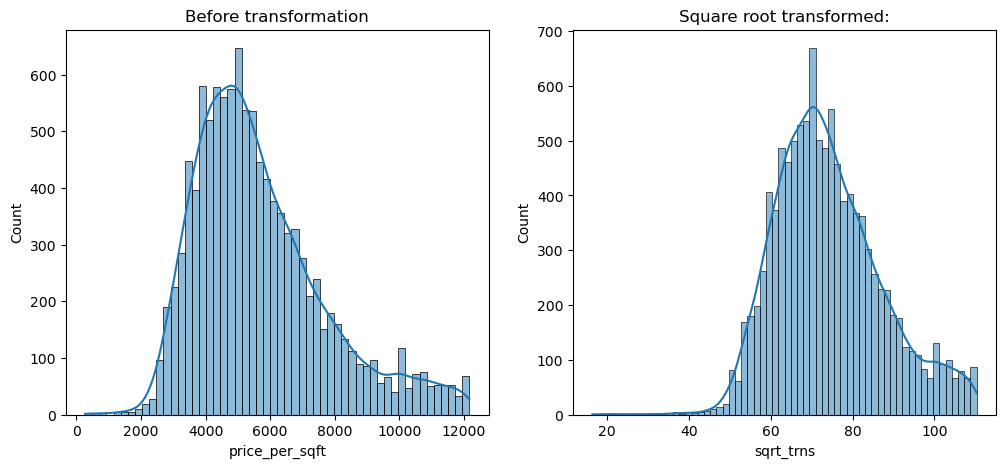

In [220]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.histplot(df_iqr['price_per_sqft'], kde=True)
plt.title("Before transformation")

plt.subplot(1,2,2)
sns.histplot(df_iqr['sqrt_trns'], kde=True)
plt.title("Square root transformed:")
plt.show()

# 3.Yeo Johnson transformation

In [207]:
pt = PowerTransformer(method = 'yeo-johnson')
df_iqr['yeo_trns'] = pt.fit_transform(df_iqr[['price_per_sqft']])


C:\Users\prave\AppData\Local\Temp\ipykernel_18896\1135913779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['yeo_trns'] = pt.fit_transform(df_iqr[['price_per_sqft']])


In [215]:
# checking skewness and kurtosis before and after transfromation

print("Skewness before transformation: ",skew(df_iqr['price_per_sqft']))
print("skewness after Yeo-Johnson transformed: ",skew(df_iqr['yeo_trns']) ,"\n")

print("kurtosis before transformation:", kurtosis(df_iqr['price_per_sqft']))
print("Kurtosis after Yeo-johnson transformation: ", kurtosis(df_iqr['yeo_trns']))

Skewness before transformation:  0.977706626713186
skewness after Yeo-Johnson transformed:  0.007755227640017275 

kurtosis before transformation: 0.7158216744424215
Kurtosis after Yeo-johnson transformation:  0.8459183600827074


Text(0.5, 1.0, 'After Yeo-Johnson Transformation')

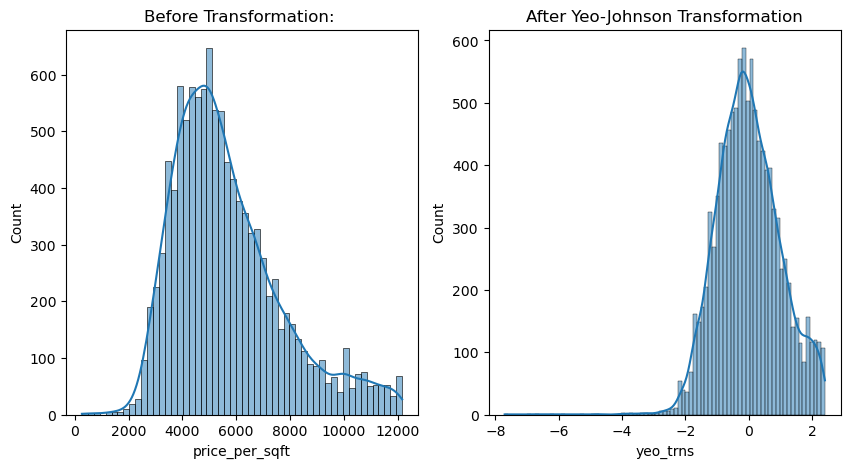

In [221]:
# ploting
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df_iqr['price_per_sqft'], kde = True)
plt.title("Before Transformation: ")


plt.subplot(1,2,2)
sns.histplot(df_iqr['yeo_trns'], kde=True)
plt.title("After Yeo-Johnson Transformation")


# Checking for the correlation between all the numerical columns and ploting heatmap. 

In [237]:
#Finding coorelation matrix of numerical columns
num_col = df_iqr[['total_sqft',	'bath',	'price','bhk','price_per_sqft']]
corr_matrix = num_col.corr()
corr_matrix

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.442982,0.656957,0.414154,0.132101
bath,0.442982,1.000000,0.558839,0.883993,0.354145
price,0.656957,0.558839,1.000000,0.488424,0.610310
bhk,0.414154,0.883993,0.488424,1.000000,0.310048
price_per_sqft,0.132101,0.354145,0.610310,0.310048,1.000000


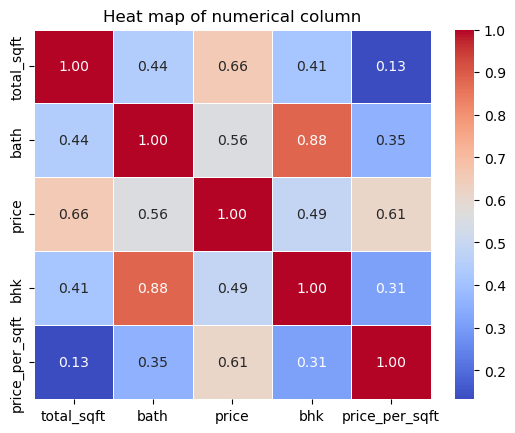

In [238]:
#drawing heat map
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heat map of numerical column")
plt.show()

# Drawing Scatter plot between the variables to check the correlation between them. 

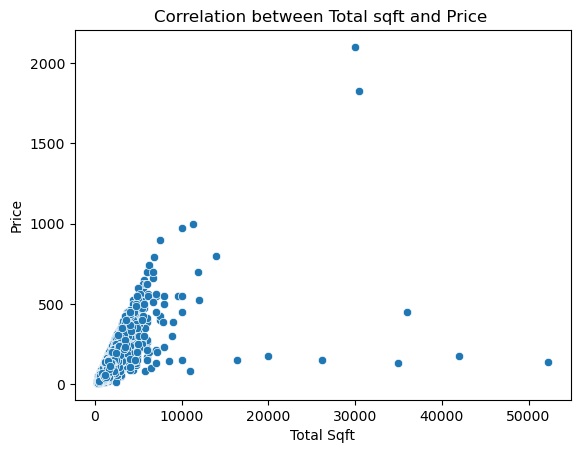

In [256]:
# Checking for correlation between price and total sqft
sns.scatterplot(x = df_iqr['total_sqft'], y = df_iqr['price'])
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Correlation between Total sqft and Price ")
plt.show()

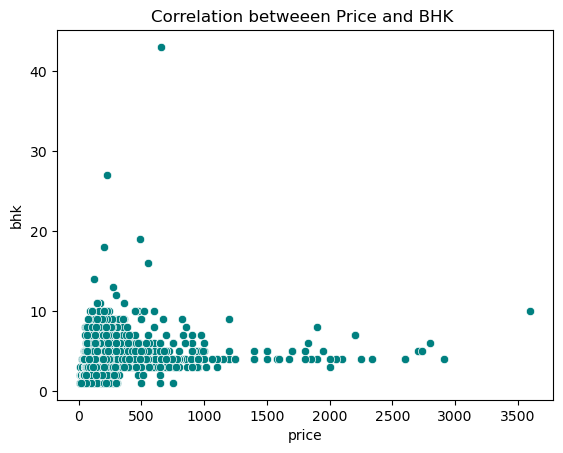

In [246]:
sns.scatterplot(x = df['price'],y=df['bhk'], color='teal')
plt.title("Correlation betweeen Price and BHK ")
plt.show()

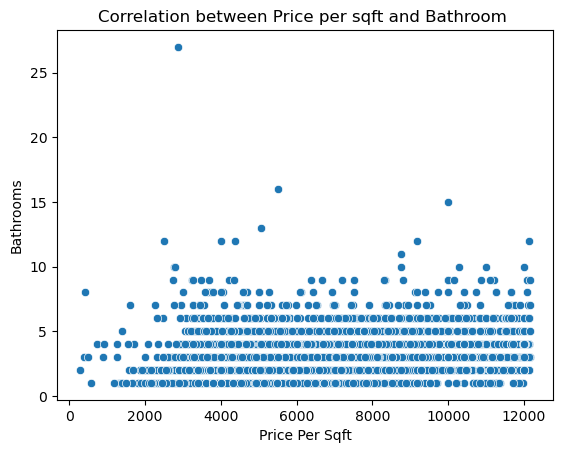

In [255]:
# Checking for correlation between price_per_sqft and bathroom
sns.scatterplot(x = df_iqr['price_per_sqft'], y = df_iqr['bath'])
plt.xlabel("Price Per Sqft")
plt.ylabel("Bathrooms")
plt.title("Correlation between Price per sqft and Bathroom ")
plt.show()